In [276]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate

np.set_printoptions(precision=3, suppress=True)

In [277]:
P=2*np.pi
x0=-np.pi
n=10

In [278]:
x=np.linspace(-P,P,500)

def f(x):
    x=x0+np.mod(x+x0,P)


    y= np.where(np.absolute(x) < np.pi/2, 4/np.pi*x, np.sign(x)*2)

    #return -x*(x-2*np.pi)
    
    #return np.where(x<1,x,2-x)-0.5
    
    return y

In [279]:
def getFourier():
    an=[]
    bn=[]
    for i in range(n):
        an.append(2/P*scipy.integrate.quad(lambda x: (f(x)*np.cos(i*2*np.pi/P*x)),0,P)[0])
        bn.append(2/P*scipy.integrate.quad(lambda x: (f(x)*np.sin(i*2*np.pi/P*x)),0,P)[0])
    return np.array(an),np.array(bn)

In [280]:
    a,b=getFourier()
    a[0]/=2
    print("a",a)
    print("b",b)

a [-0.  0. -0.  0.  0.  0. -0.  0. -0.  0.]
b [ 0.     2.084 -0.637  0.334 -0.318  0.287 -0.212  0.165 -0.159  0.151]


<BarContainer object of 10 artists>

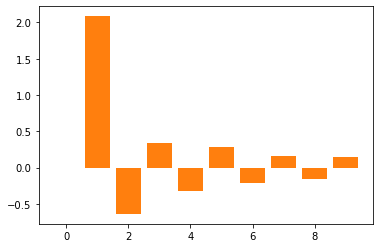

In [281]:
plt.bar([i for i in range(n)],a)
plt.bar([i for i in range(n)],b)

Text(0.5, 0.98, 'Spectrum')

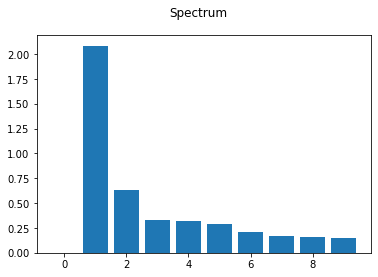

In [282]:
plt.bar([i for i in range(n)],np.sqrt(a*a+b*b))
plt.suptitle('Spectrum')

In [283]:
cosines=np.array([ np.cos(i*2*np.pi/P*x) for i in range(0,n)])
sinuses=np.array([ np.sin(i*2*np.pi/P*x) for i in range(0,n)])

In [284]:
sC=(cosines.T*a).T
sS=(sinuses.T*b).T

In [285]:
SC=np.sum(sC,axis=0)
SS=np.sum(sS,axis=0)
S=SC+SS

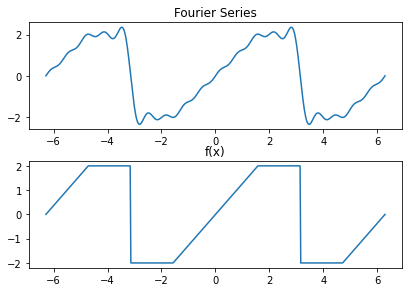

In [286]:
fig,(ax1,ax2)=plt.subplots(2,1)
fig.tight_layout()

ax1.plot(x,S)
ax1.title.set_text('Fourier Series')

ax2.plot(x,f(x))
ax2.title.set_text('f(x)')